In [65]:
% matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd

In [2]:
gen_event_ = "ttbar-100"
outfile_ = "outfile-" + gen_event_ + ".root"
data_ = uproot.open(outfile_)["ntuples"]["tree"]
data_.keys()

['nevent',
 'nlumi',
 'nrun',
 'trackEta',
 'trackPhi',
 'qoverp',
 'dxy',
 'dsz',
 'trackPt',
 'trackTPIdx',
 'trackEtaError',
 'trackPhiError',
 'qoverpError',
 'dxyError',
 'dszError',
 'trackPtError',
 'trackParameters',
 'covarianceArray',
 'stereoHitX',
 'stereoHitY',
 'stereoHitZ',
 'stereoHitR',
 'stereoHitPhi',
 'stereoHitEta',
 'stereoHitLayer',
 'stereoTPIndex',
 'stereoHitMatch',
 'monoHitX',
 'monoHitY',
 'monoHitZ',
 'monoHitR',
 'monoHitPhi',
 'monoHitEta',
 'monoHitLayer',
 'monoTPIndex',
 'monoHitMatch']

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#fig_ = plt.figure()
#ax_ = Axes3D(fig_)

In [5]:
# Find Number of Events based on any property length
track_eta_ = data_.array("trackEta")
print "Number of Events: ", len(track_eta_)

Number of Events:  100


Iterating over trackEta from 6041 tracks


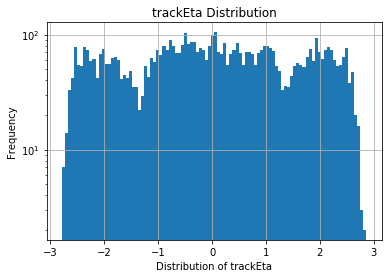

Iterating over trackPhi from 6041 tracks


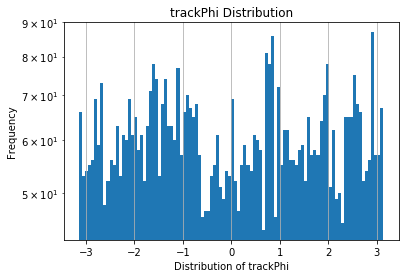

Iterating over qoverp from 6041 tracks


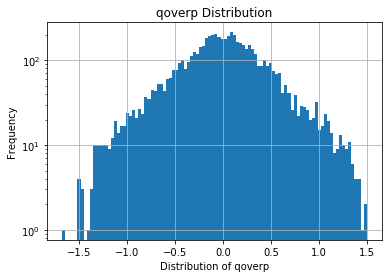

Iterating over dxy from 6041 tracks


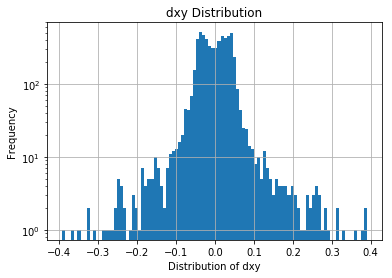

Iterating over dsz from 6041 tracks


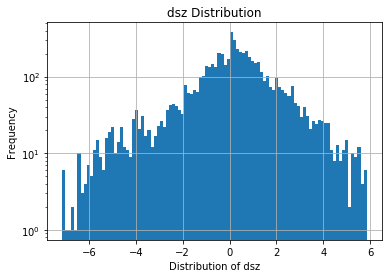

In [30]:
# Iterate over 5 track parameters and plot their distribution
# Note: THIS IS LOG SCALE

for key in ["trackEta", "trackPhi", "qoverp", "dxy", "dsz"]:
    track_param_ = data_.array(key)
    concat_track_param_ = []
    
    for param_val_ in track_param_:
        concat_track_param_.extend(param_val_)
    print "Iterating over", key, "from", len(concat_track_param_), "tracks"
    
    plt.clf()
    ax_ = plt.subplot()
    ax_.hist(concat_track_param_, histtype='stepfilled', bins=100, orientation='vertical')
    plt.grid(True)
    plt.ylabel('Frequency')
    
    # Comment the next line for a linear scale
    plt.yscale('log')
    
    plt.xlabel('Distribution of ' + key)
    plt.title(key + ' Distribution')
    plt.savefig('plots/' + gen_event_ + '/track/' + key)
    plt.show()

Iterating over track pt from 6041 tracks


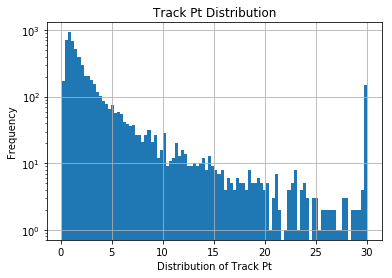

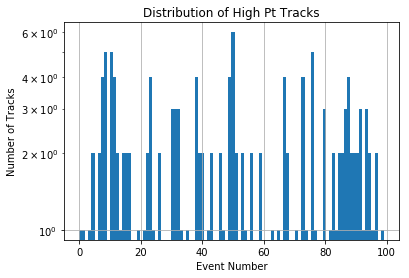

In [45]:
# Additional visualization discarding high-pt events for more clarity

track_pt_ = data_.array('trackPt')
concat_track_pt_ = []
high_pt_events_ = {}

for event_ in range(len(track_pt_)):
    for trk_pt_val_ in track_pt_[event_]:
        
        # What is a reasonable general threshold for Track Pt?
        if trk_pt_val_ < 30:
            concat_track_pt_.append(trk_pt_val_)
        else:
            if event_ in high_pt_events_:
                high_pt_events_[event_] += 1
            else:
                high_pt_events_[event_] = 1
            concat_track_pt_.append(30)
            
print "Iterating over track pt from", len(concat_track_pt_), "tracks"

plt.clf()
ax_ = plt.subplot()
ax_.hist(concat_track_pt_, histtype='stepfilled', bins=100, orientation='vertical')
plt.grid(True)
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlabel('Distribution of Track Pt')
plt.title('Track Pt Distribution')
plt.savefig('plots/' + gen_event_ + '/track/track-pt')
plt.show()

# Events with high pt tracks and their distribution

plt.clf()
ax_ = plt.subplot()
ax_.hist(high_pt_events_.keys(), weights=high_pt_events_.values(), bins=100, orientation='vertical')
plt.grid(True)
plt.ylabel('Number of Tracks')
plt.yscale('log')
plt.xlabel('Event Number')
plt.title('Distribution of High Pt Tracks')
plt.savefig('plots/' + gen_event_ + '/track/high-pt-events')
plt.show()


3428


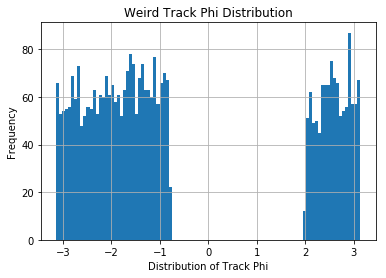

In [25]:
# Input the range of values with odd track phi in case it is a specific part

# Note: This is ONLY useful if there is a 'sub-portion' of the graph that is weird-looking
# If it is oddly distributed throughout, an alternative means of visualization is needed

track_phi_ = data_.array('trackPhi')
concat_track_phi_ = []
anomalous_phi_event_number_ = {}
for event_ in range(len(track_phi_)):
    
    for phi_idx_ in range(len(track_phi_[event_])):
        
        if (track_phi_[event_][phi_idx_] >= -0.8) and (track_phi_[event_][phi_idx_] <= 2):
            if event_ in anomalous_phi_event_number_:
                anomalous_phi_event_number_[event_] += 1
            else:
                anomalous_phi_event_number_[event_] = 1
            continue
        else:    
            concat_track_phi_.append(track_phi_[event_][phi_idx_])
        
print len(concat_track_phi_)
ax_ = plt.subplot()
ax_.hist(concat_track_phi_, histtype='stepfilled', bins=100, orientation='vertical')
plt.grid(True)
plt.ylabel('Frequency')
plt.xlabel('Distribution of Track Phi')
plt.title('Weird Track Phi Distribution')
plt.show()

{0: 29, 1: 16, 2: 33, 3: 45, 4: 16, 5: 35, 6: 27, 7: 36, 8: 22, 9: 14, 10: 22, 11: 42, 12: 20, 13: 6, 14: 48, 15: 33, 16: 35, 17: 36, 18: 14, 19: 42, 20: 25, 21: 28, 22: 36, 23: 35, 24: 20, 25: 38, 26: 27, 27: 22, 28: 25, 29: 29, 30: 27, 31: 35, 32: 15, 33: 12, 34: 35, 35: 18, 36: 13, 37: 23, 38: 29, 39: 19, 40: 52, 41: 11, 42: 41, 43: 12, 44: 21, 45: 32, 46: 12, 47: 29, 48: 25, 49: 24, 50: 32, 51: 14, 52: 26, 53: 28, 54: 35, 55: 46, 56: 24, 57: 42, 58: 20, 59: 30, 60: 34, 61: 29, 62: 10, 63: 24, 64: 47, 65: 37, 66: 40, 67: 25, 68: 32, 69: 26, 70: 20, 71: 15, 72: 23, 73: 24, 74: 14, 75: 21, 76: 36, 77: 21, 78: 12, 79: 34, 80: 20, 81: 24, 82: 30, 83: 16, 84: 23, 85: 23, 86: 31, 87: 31, 88: 41, 89: 14, 90: 21, 91: 33, 92: 9, 93: 13, 94: 26, 95: 20, 96: 16, 97: 25, 98: 18, 99: 17}
100


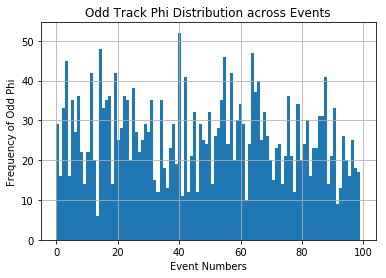

In [28]:
# Plot histogram of events with oddly distributed track phi
print anomalous_phi_event_number_
odd_phi_count_ = anomalous_phi_event_number_.values()
x_index_ = range(len(odd_phi_count_))
# print anomalous_phi_event_number_
ax_ = plt.subplot()
ax_.hist(x_index_, weights=odd_phi_count_, bins=100, orientation='vertical')
plt.grid(True)
plt.ylabel('Frequency of Odd Phi')
plt.xlabel('Event Numbers')
plt.title('Odd Track Phi Distribution across Events')
plt.show()

Added 6041 tracks from 100 events


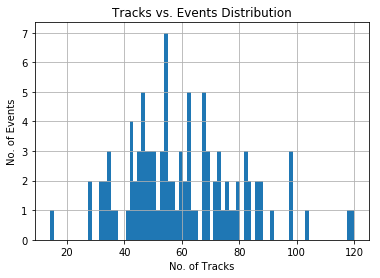

In [9]:
# Plot the distribution of tracks in events 
# using the length of any paramater array - e.g. track eta

track_Eta_ = data_.array("trackEta")
concat_num_tracks_ = []

for i in range(len(track_Eta_)):
     concat_num_tracks_.append(len(track_Eta_[i]))
print "Added", sum(concat_num_tracks_), "tracks from", len(concat_num_tracks_), "events"
ax_ = plt.subplot()
ax_.hist(concat_num_tracks_, histtype='bar', bins=80, align='mid', orientation='vertical')

plt.xlabel('No. of Tracks')
plt.ylabel('No. of Events')
plt.title('Tracks vs. Events Distribution')
plt.grid(True)
plt.savefig('plots/' + gen_event_ + '/track/event-track-distribution')
plt.show()

In [10]:
# TODO: Look at whether the same/similar event is getting replicated multiple times

<IPython.core.display.Javascript object>


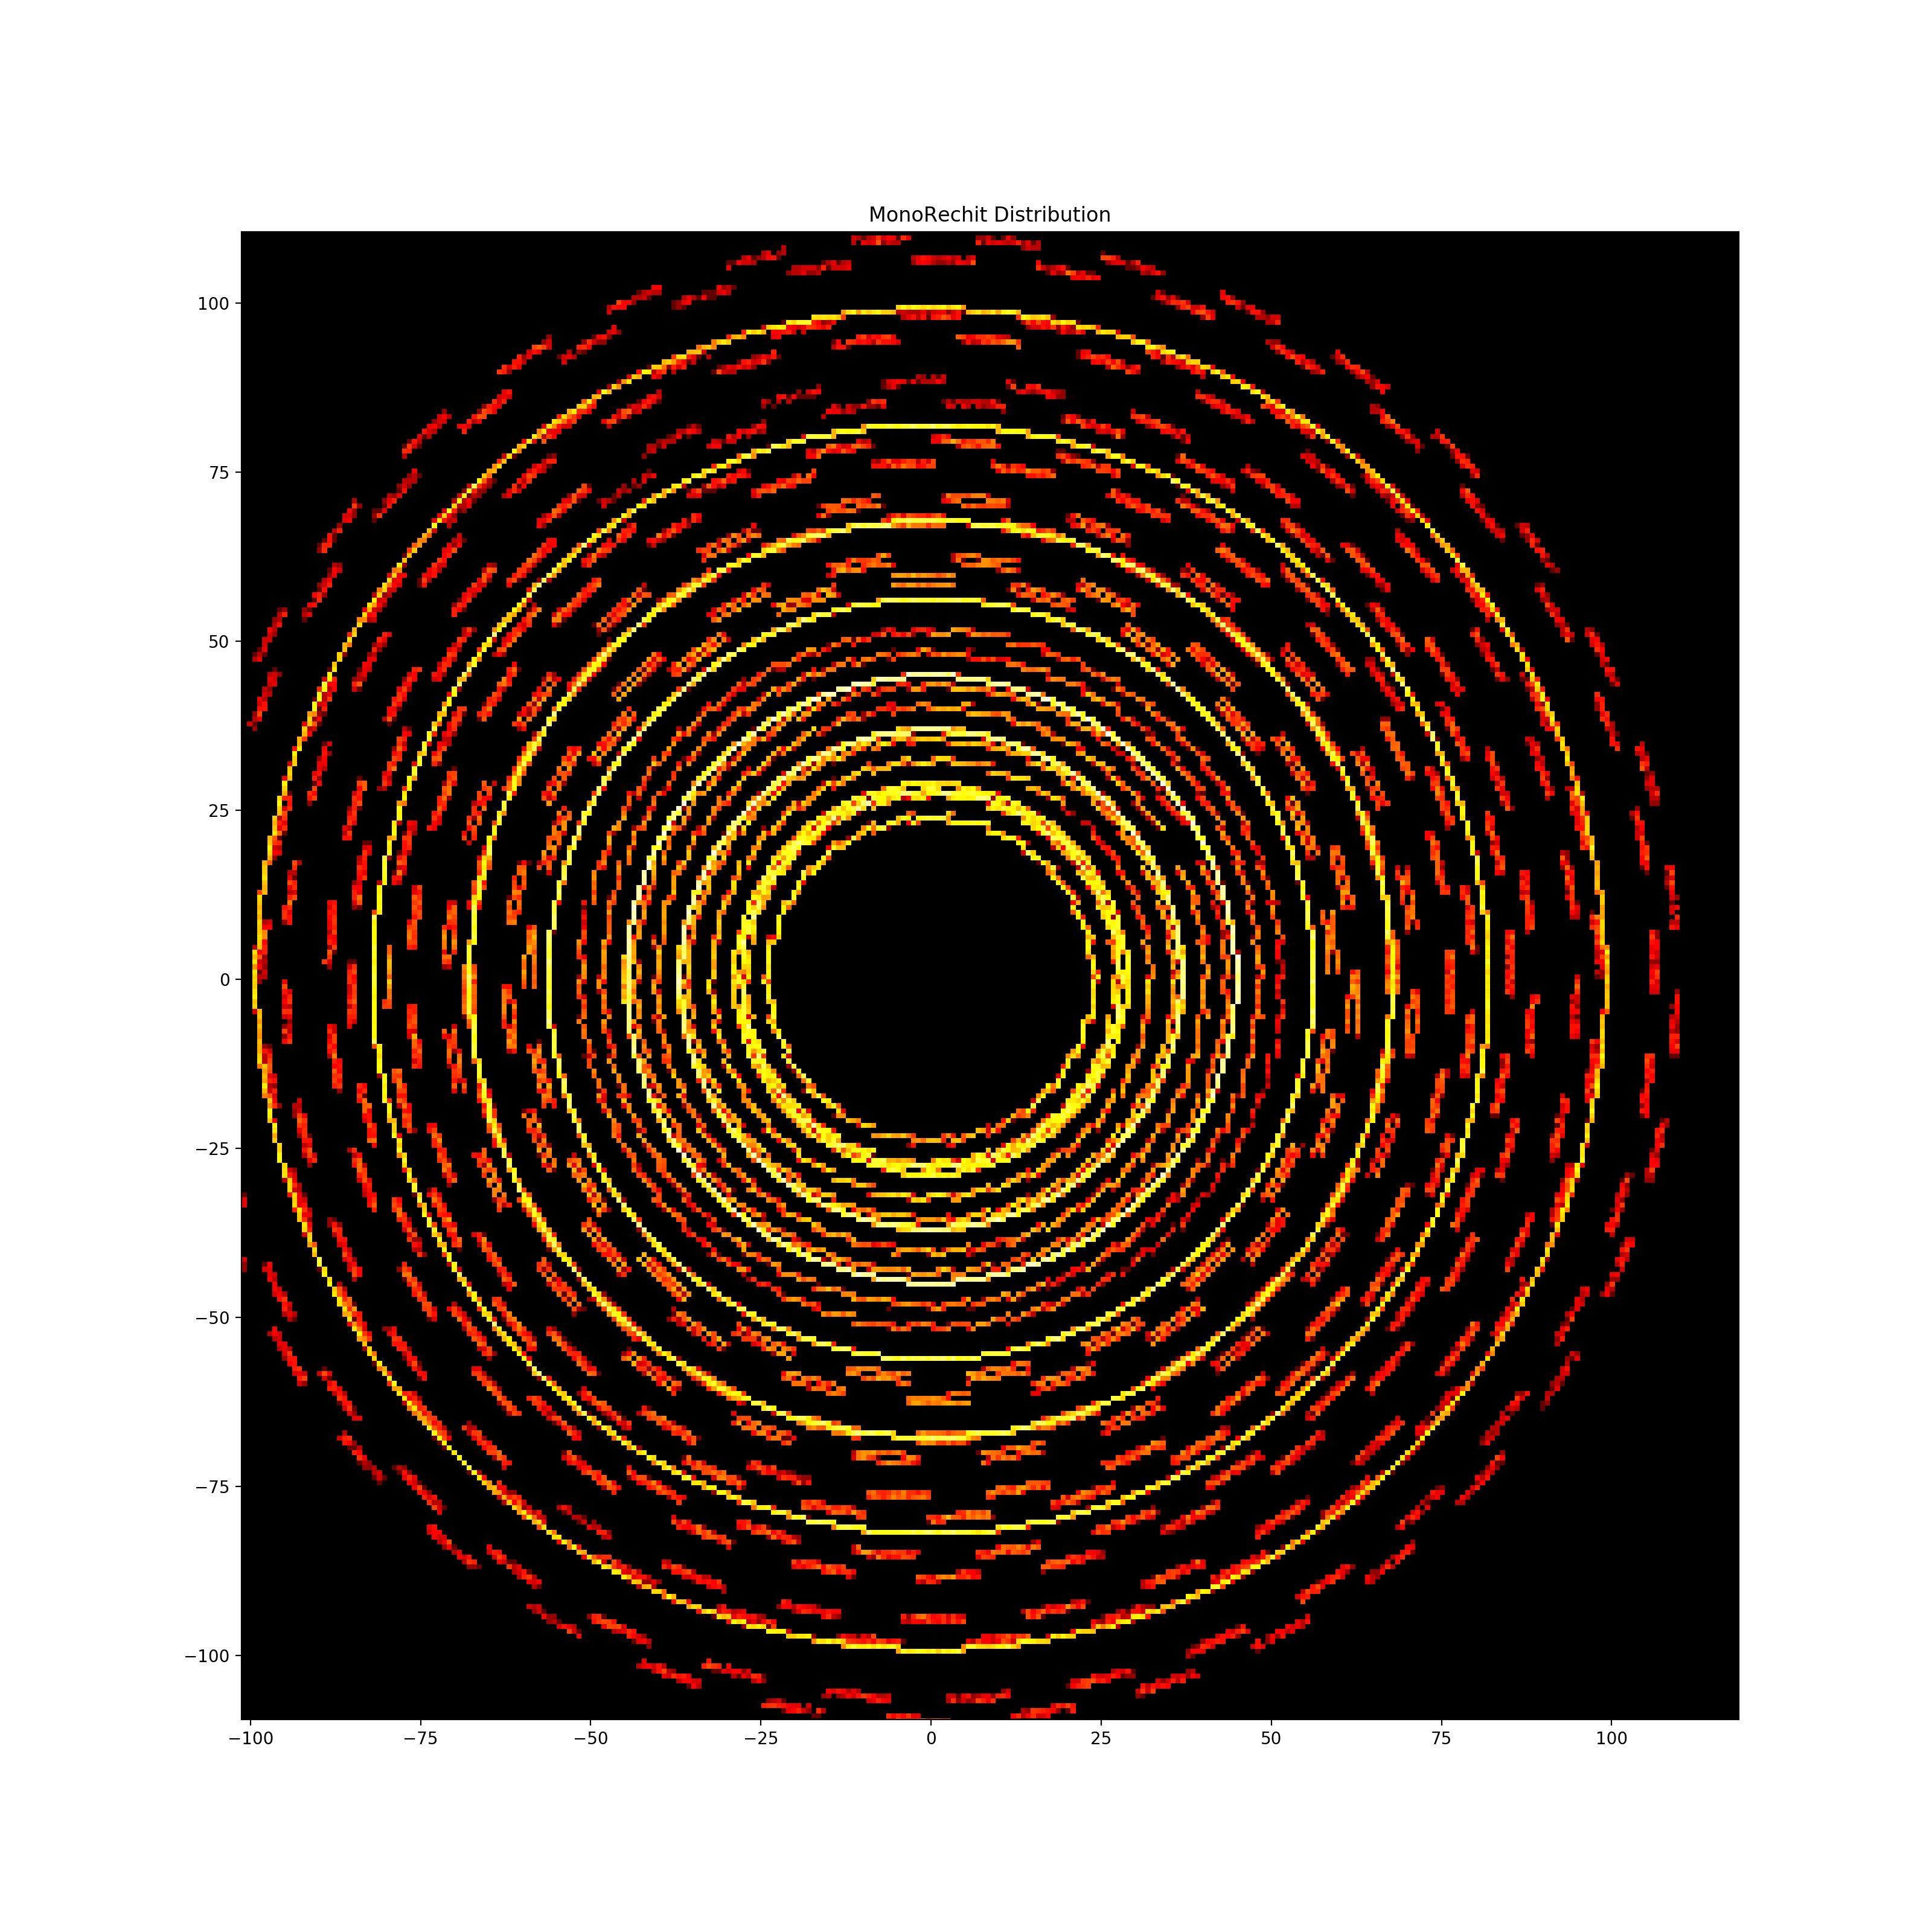

In [88]:
# ToDo: Add lognorm colormap

mono_x_ = data_.array("monoHitX") 
mono_y_ = data_.array("monoHitY")
mono_z_ = data_.array("monoHitZ")

if len(mono_x_) == len(mono_y_):
    concat_mono_x_ = []
    concat_mono_y_ = []

    for i in range(len(mono_x_)):
        concat_mono_x_.extend(mono_x_[i])
        concat_mono_y_.extend(mono_y_[i])

plt.figure(figsize=(16,16))
ax_ = plt.subplot(1,1,1)
# Plot the 2D Histogram for Mono Rechits
plt.title('MonoRechit Distribution')
ax_.patch.set_facecolor('black')
plt.hist2d(concat_mono_x_, concat_mono_y_, bins=300, norm=matplotlib.colors.LogNorm(), cmap='hot')
plt.savefig('plots/' + gen_event_ + '/stereo/rechitdistribution')
plt.show()

<IPython.core.display.Javascript object>


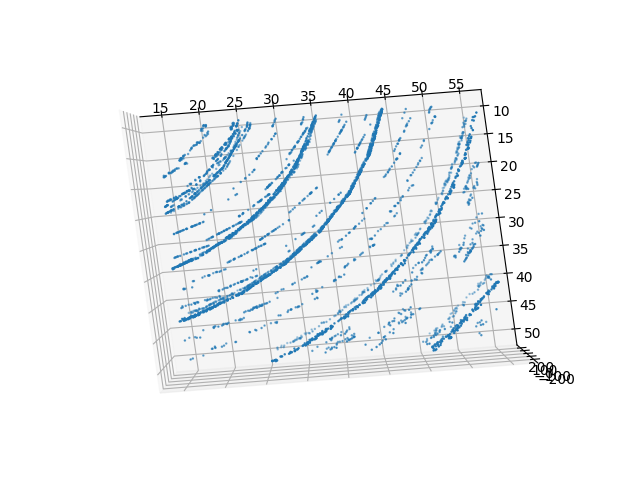

In [89]:
# Trying to explore the hole in 3 dimensions
# Not quite possible to do manually?

fig_ = plt.figure()
ax_ = Axes3D(fig_)
concat_mono_x_ = []
concat_mono_y_ = []
concat_mono_z_ = []

for event_ in range(10):
    for x, y, z, in zip(mono_x_[event_], mono_y_[event_], mono_z_[event_]):
        if x < 55 and x > 15 and y > 10 and y < 50:
            concat_mono_x_.append(x)
            concat_mono_y_.append(y)
            concat_mono_z_.append(z)   

ax_.scatter3D(concat_mono_x_, concat_mono_y_, concat_mono_z_, s=0.6)

<Figure size 432x288 with 0 Axes>

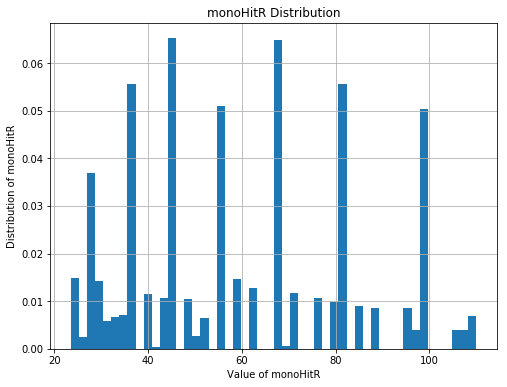

<Figure size 432x288 with 0 Axes>

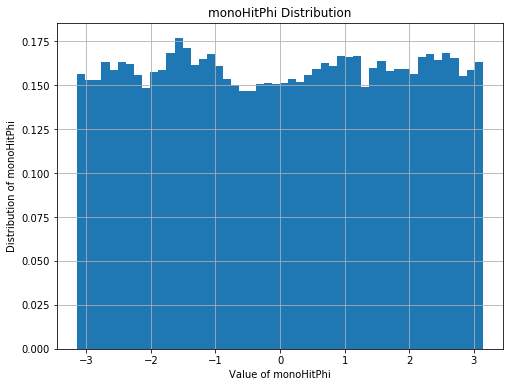

<Figure size 432x288 with 0 Axes>

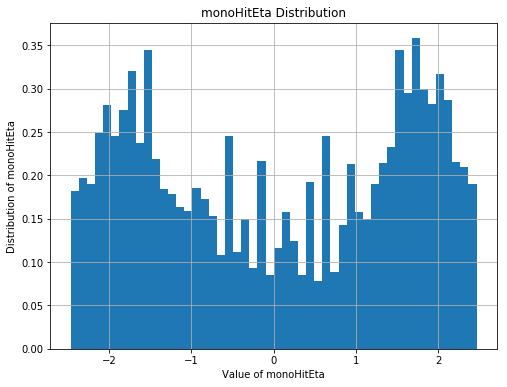

In [13]:
# Define a loop that plots R, Phi, and Eta for Mono Hits
position_ = 1
for param in ["monoHitR", "monoHitPhi", "monoHitEta"]:
    mono_param_ = data_.array(param)
    concat_mono_param_ = []
    
    for i in range(len(mono_param_)):
            concat_mono_param_.extend(mono_param_[i])

    plt.clf()
    fig, ax_ = plt.subplots(figsize=(8, 6))
    position_ += 1
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('MonoRechit Distribution of ' + param)
    ax_.hist(concat_mono_param_, bins=50, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.grid(True)
    plt.savefig('plots/' + gen_event_ + '/mono/' + param)
    plt.show()

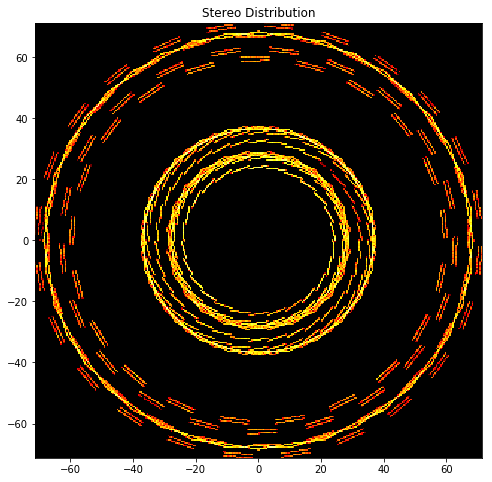

In [63]:
# ToDo: Add lognorm colormap

stereo_x_ = data_.array("stereoHitX") 
stereo_y_ = data_.array("stereoHitY")
stereo_z_ = data_.array("stereoHitZ")

if len(mono_x_) == len(mono_y_):
    concat_stereo_x_ = []
    concat_stereo_y_ = []

    for i in range(len(mono_x_)):
        concat_stereo_x_.extend(stereo_x_[i])
        concat_stereo_y_.extend(stereo_y_[i])

plt.figure(figsize=(8,8))
ax_ = plt.subplot(1,1,1)
# Plot the 2D Histogram for Mono Rechits
ax_.set_title('Stereo Distribution')
ax_.patch.set_facecolor('black')
ax_.hist2d(concat_stereo_x_, concat_stereo_y_, bins=300, norm=matplotlib.colors.LogNorm(), cmap='hot')
plt.savefig('plots/' + gen_event_ + '/stereo/rechitdistribution')
plt.show()

<Figure size 432x288 with 0 Axes>

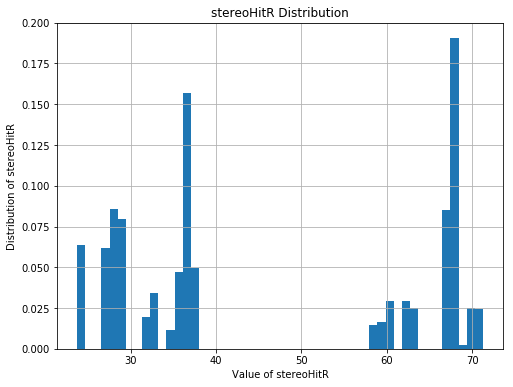

<Figure size 432x288 with 0 Axes>

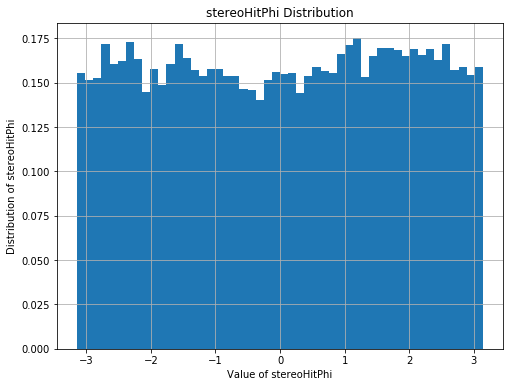

<Figure size 432x288 with 0 Axes>

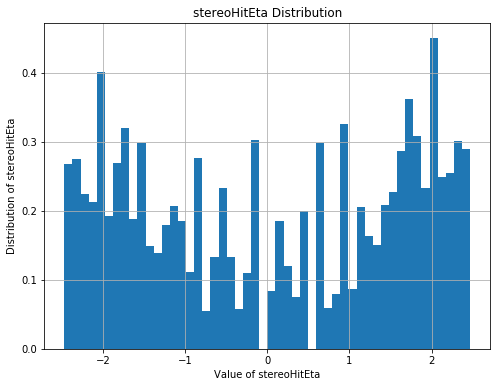

In [14]:
# Define a loop that plots R, Phi, and Eta for Stereo Hits

for param in ["stereoHitR", "stereoHitPhi", "stereoHitEta"]:
    stereo_param_ = data_.array(param)
    concat_stereo_param_ = []
    
    for i in range(len(mono_param_)):
            concat_stereo_param_.extend(stereo_param_[i])

    plt.clf()
    fig, ax_ = plt.subplots(figsize=(8, 6))
    position_ += 1
    # Plot the 2D Histogram for Mono Rechits
    ax_.set_title('StereoRechit Distribution of ' + param)
    ax_.hist(concat_stereo_param_, bins=50, histtype='stepfilled', align='mid', orientation='vertical', density=True)
    plt.xlabel('Value of ' + param)
    plt.ylabel('Distribution of ' + param)
    plt.title(param + ' Distribution')
    plt.grid(True)
    plt.savefig('plots/' + gen_event_ + '/stereo/' + param)
    plt.show()

In [15]:
stereo_tp_idx_ = data_.array('stereoTPIndex')
mono_tp_idx_ = data_.array('monoTPIndex')
track_tp_idx_ = data_.array('trackTPIdx')

# Check that both have been generated for the same number of events
# Just for clarity
print len(track_tp_idx_) == len(stereo_tp_idx_),
print len(track_tp_idx_) == len(mono_tp_idx_),
print "\nTotal", len(track_tp_idx_), "events"

True True 
Total 100 events


In [16]:
# Check if any tracks map to multiple tracking particles
for i in range(len(track_tp_idx_)):
    for track_tp_list_ in track_tp_idx_[i]:
        if len(track_tp_list_) > 1:
            print "Track maps to multiple TPs in event", i

In [17]:
# Check if any hits map to multiple tracking particles
# It is NOT NECESSARY that these TPs map to actual tracks
%%time
hit_tp_count_ = {}

# Iterate over event length in mono and stereo rechits
for event_ in range(len(stereo_tp_idx_)):
    for stereo_tp_list_ in stereo_tp_idx_[event_]:
        tp_len_ = len(stereo_tp_list_)
        # Add to a dictionary of <num of TP matches : hit count>
        if tp_len_ in hit_tp_count_:
            hit_tp_count_[tp_len_] += 1
        else:
            hit_tp_count_[tp_len_] = 1
    
    for mono_tp_list_ in mono_tp_idx_[event_]:
        tp_len_ = len(mono_tp_list_)
        # Add to a dictionary of <num of TP matches : hit count>
        if tp_len_ in hit_tp_count_:
            hit_tp_count_[tp_len_] += 1
        else:
            hit_tp_count_[tp_len_] = 1

# This prints how many hits map to multiple matches
# <num matches to TPs: ncount of hits>
print "Number of matches and number of hits with those many TP matches\n", hit_tp_count_

SyntaxError: invalid syntax (<ipython-input-17-fa7879ae4066>, line 3)

In [ ]:
# NEEDS OPTIMIZATION - RUNS FOREVER
# 3D Dataframes better?
%% time
# Check how many rechits map to actual tracks?

# Iterate over event length in mono and stereo rechits
for event_ in range(len(stereo_tp_idx_)):
    for stereo_tp_list_ in stereo_tp_idx_[event_]:
        count_ = 0
        for track_tp_list_ in track_tp_idx_[event_]:    
            if len([idx_set_ for idx_set_ in stereo_tp_list_ if idx_set_ in track_tp_list_]) > 0:
                count_ += 1
        if hit_tp_count_[count_]:
            hit_tp_count_[count_] += 1
        else:
            hit_tp_count_[count_] = 1
    #print "Track Matches Stereo:", count_
    
    for mono_tp_list_ in mono_tp_idx_[event_]:
        count_ = 0
        for track_tp_list_ in track_tp_idx_[event_]:    
            if len([idx_set_ for idx_set_ in mono_tp_list_ if idx_set_ in track_tp_list_]) > 0:
                count_ += 1
        if hit_tp_count_[count_]:
            hit_tp_count_[count_] += 1
        else:
            hit_tp_count_[count_] = 1
    #print "Track Matches Mono:", count_
    
# This prints how many hits map to actual (including multiple) track matches
# <num matches to Tracks: count of hits>
print "Number of matches and number of hits with those many Track matches\n", hit_tp_count_                

In [ ]:
# Check that the same number of entries are recorded for stereo rechits
concat_stereo_tp_idx_ = []
for i in range(len(stereo_tp_idx_)):
    concat_stereo_tp_idx_.extend(stereo_tp_idx_[i])
    
print len(concat_stereo_tp_idx_) == len(concat_stereo_param_)

In [ ]:
import pandas as pd

In [79]:
mono_hit_match_ = data_.array('monoHitMatch')
stereo_hit_match_ = data_.array('stereoHitMatch')

In [81]:

for event_ in range(len(mono_hit_match_)):
    for num_matches_rechit_ in mono_hit_match_[event_]:
        if num_matches_rechit_ > 1:
            break


99


In [ ]:
rechit_global_map_ = {"Event ID": [], "Rechit ID":[], "Unmatched Track TP Index":[], "Matched Track TP Index": []}
global_counter_ = 0

# Check that they have the same number of events 
if len(stereo_tp_idx_) == len(mono_tp_idx_):
    for event_ in range(len(stereo_tp_idx_)):
        for idx_ in range(len(stereo_tp_idx_[event_])):
            rechit_global_map_["Event ID"].append(event_)
            rechit_global_map_["Rechit ID"].append(global_counter_)
            rechit_global_map_["Matched"].append()
            
            rechit_global_map_["Track TP Index"].append(stereo_tp_idx_[event_][idx_])  

            global_counter_ += 1
else:
    print "Length of mono and stereo hits are a mismatch!"
    print "Some event has zero mono or stereo hits; is this normal?"

In [ ]:
global_counter_

In [ ]:

'''
Dataframe column titles and datatypes

:Event ID: int
:Rechit ID: int
:Track ID: int
:Rechit IDs: list(int)
:Track IDs: list(int)
:Matched/Unmatched Track TP Index: set(int)  # iterating over sets has lower complexity
:Rechit TP Index: set(int)  # iterating over sets has lower complexity
''' 

In [ ]:
# Define the dictionaries to be cast into dataframes

track_to_rechit_map_ = {"Event ID": [], "Track ID":[], "Track TP Index":[], "Rechit IDs":[], "Matched": []}
rechit_to_track_map_ = {"Event ID": [], "Rechit ID":[], "Rechit TP Index":[], "Track IDs":[], "Matched": []}

In [ ]:
# Initialize the Global Track ID
track_id_ = 0

for event_id_ in range(len(stereo_tp_idx_)):
    # Check the TPs matched to tracks and find rechits for each TP (Stereo and Mono)
    for track_tp_list_ in track_tp_idx_[event_id_]:
        
        # Find matches in stereo rechits within that event
        for stereo_tp_list_ in stereo_tp_idx_[event_id_]:
            matches_ = [idx_ for idx_ in track_tp_list_ if idx_ in stereo_tp_list_]
            if matches_:
                track_to_rechit_map_["Event ID"].append(event_id_)
                track_to_rechit_map_["Track ID"].append(track_id_)
                track_to_rechit_map_["Track TP Index"].append(track_tp_list_)
                
                # TODO: Assign each rechit a unique ID that you can retrieve easily
                track_to_rechit_map_["Rechit IDs"].append()
        
        
        # Increment the Global Track ID
        track_id_ += 1
            
    
    # Check the TPs matched to Rechits and find the tracks for each TP (Stereo and Mono)
    
    # Append to respective dictionaries and log the number of hits (Stereo and Mono)
    # Corroborate the counted number of matches with the hitmatch column data (Stereo and Mono)
    
    # TODO: Add Paremeters of these Rechits to a separate array